In [1]:
import seaborn as sns
# color palette
pal = sns.color_palette("hls", 16)
colors = list(pal.as_hex())
colors
pal

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5661999999999999, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.7638, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.3738000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.86, 0.6962000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6337999999999998, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.43619999999999975, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.8261999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996),
 (0.86, 0.33999999999999997, 0.5037999999999996)]

../figures/ZOZO_SNIPW_cumulative_rewards.png
../figures/ZOZO_IPW_cumulative_rewards.png
../figures/ZOZO_RM_cumulative_rewards.png


<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

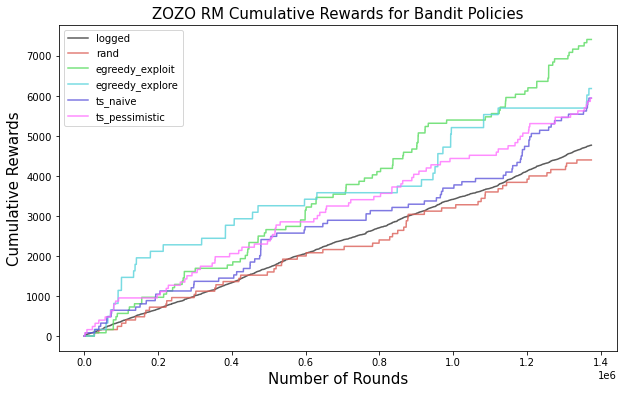

In [58]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from pathlib import Path

# predefine directory
fig_dir = Path('../figures')

In [ ]:

# visualizing cumulative rewards 
def visualize_cumulative_rewards(results_dict_list,
                                fig_dir,
                                fig_name,
                                ope,
                                dataset):
    plt.clf()
    fig, ax = plt.subplots(figsize=(10,6))
    
    # iterating over list of results
    for results in results_dict_list:
        # iterating over policies within results
        for policy, rewards in results.get('policy_feedback').items():

            if dataset.lower() == 'zozo':
                cumulative_rewards = rewards.get('reward').cumsum() 
                colors = ['#333333', '#db5f57', '#57db5f', '#57d3db', '#5f57db', '#FF6FFF']

                ax.set_xlabel("Number of Rounds")

            elif dataset.lower() == 'deezer':
                cumulative_rewards = pd.DataFrame(rewards).groupby("batches").sum().cumsum()['reward']
                ax.set_xlabel("Number of Batches")
                colors = list(sns.color_palette("hls", 16).as_hex())

            else: 
                print('Please Set `Dataset` to either `ZOZOTOWN` or `Deezer` ')
                return 

            ax.plot(cumulative_rewards, alpha = 0.8, label=policy)

    for i in range(len(colors)):
        plt.gca().get_lines()[i].set_color(colors[i])
    
    # labeling
    plt.rc('axes', labelsize=15)    
    plt.rc('xtick', labelsize = 10)
    plt.rc('ytick', labelsize = 10)     
    
    ax.legend(loc='upper left')
    ax.set_ylabel("Cumulative Rewards")
    ax.set_title(dataset.upper() + ' ' + ope + ' Cumulative Rewards for Bandit Policies')
    
    print(str(fig_dir / (dataset.upper() + '_' + ope + fig_name)))
    plt.savefig(str(fig_dir / (dataset.upper() + '_' + ope + fig_name)), dpi = 1500, bbox_inches='tight')

# opening ZOZO data
zozo_ipw = pickle.load(open('../data/results/zozo_ipw.pickle', 'rb'))
zozo_snipw = pickle.load(open('../data/results/zozo_snipw.pickle', 'rb'))
zozo_rm = pickle.load(open('../data/results/zozo_rm.pickle', 'rb'))

# each OBP gets its own graph
visualize_cumulative_rewards([zozo_snipw],
                             fig_dir = Path('../figures'),
                             fig_name = '_cumulative_rewards.png',
                             ope = 'SNIPW',
                             dataset = 'zozo')

visualize_cumulative_rewards([zozo_ipw],
                             fig_dir = Path('../figures'),
                             fig_name = '_cumulative_rewards.png',
                             ope = 'IPW',
                             dataset = 'zozo')


visualize_cumulative_rewards([zozo_rm],
                             fig_dir = Path('../figures'),
                             fig_name = '_cumulative_rewards.png',
                             ope = 'RM',
                             dataset = 'zozo')


# deezer cumulative reward plot
deezer_basic = pickle.load(open('../data/results/basic_deezer.pickle', 'rb'))
deezer_linear = pickle.load(open('../data/results/linear_deezer.pickle', 'rb'))
deezer_liner_T = pickle.load(open('../data/results/linear_thompson_deezer.pickle', 'rb'))

# batch together the various policies
deezer_results = [deezer_basic, deezer_linear, deezer_liner_T]

visualize_cumulative_rewards(deezer_results,
                             fig_dir = Path('../figures'),
                             fig_name = '_cumulative_rewards.png',
                             ope = '',
                             dataset = 'deezer')


random
egreedy_exploit
egreedy_explore
ts_naive
ts_pessimistic
seg_egreedy_explore
seg_egreedy_exploit
seg_ts_naive
seg_ts_pessimistic
etc_exploit
etc_explore
seg_etc_exploit
seg_etc_explore
lin_egreedy_exploit
lin_egreedy_explore
lin_ts


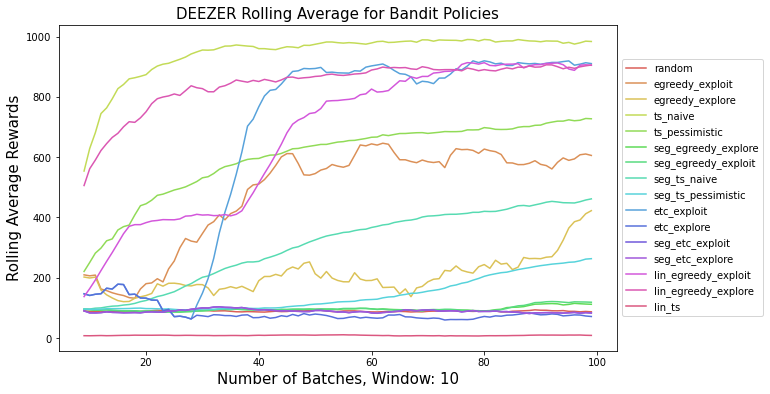

In [55]:
# plotting ZOZOTown Rolling Average
# DEFUNCT AS GRAPHS ARE TOO STEEP
#
# fig, ax = plt.subplots(figsize=(10,6))

# # set window for rolling mean 
# window = 300000
# for policy, rewards in zozo_results.get('policy_feedback').items(): 
#     print(policy)
    
#     zozo_rewards = pd.DataFrame(zozo_results.get('policy_feedback').get(policy).get('reward'))
#     rolling_rewards = zozo_rewards.rolling(window).mean()
#     plt.plot(rolling_rewards, label = policy)
    
# # setting colors
# colors = ['#333333', '#db5f57', '#57db5f', '#57d3db', '#5f57db', '#FF6FFF']
# for i in range(len(colors)):
#     plt.gca().get_lines()[i].set_color(colors[i])

# # labeling
# ax.legend()
# ax.set_xlabel("Number of Batches, Window: " + str(window))
# ax.set_ylabel("Rolling Average Rewards")
# ax.set_title('ZOZOTOWN Rolling Average for Bandit Policies, window: ' + str(window))
# plt.savefig(str(fig_dir / 'ZOZO_Rolling_Average_Reward.png'), dpi = 1500)



# plotting Deezer Rolling Average
fig, ax = plt.subplots(figsize=(10,6))

# iterating over list of results
for results in deezer_results:
    # set window for rolling mean over batches
    window = 10
    for policy, rewards in results.get('policy_feedback').items(): 
        print(policy)
        batched_df = pd.DataFrame(results.get('policy_feedback').get(policy))
        rolling_rewards = batched_df.groupby('batches')['reward'].sum().rolling(window).mean()
        plt.plot(rolling_rewards, alpha = 1, label = policy)

# setting colors
colors = list(sns.color_palette("hls", 16).as_hex())
for i in range(len(colors)):
    plt.gca().get_lines()[i].set_color(colors[i])

#labeling
plt.rc('axes', labelsize=15)    
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)   

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Number of Batches, Window: " + str(window))
ax.set_ylabel("Rolling Average Rewards")
ax.set_title('DEEZER Rolling Average for Bandit Policies')
plt.savefig(str(fig_dir / 'DEEZER_Rolling_Average_Reward.png'), dpi = 1500, bbox_inches='tight')

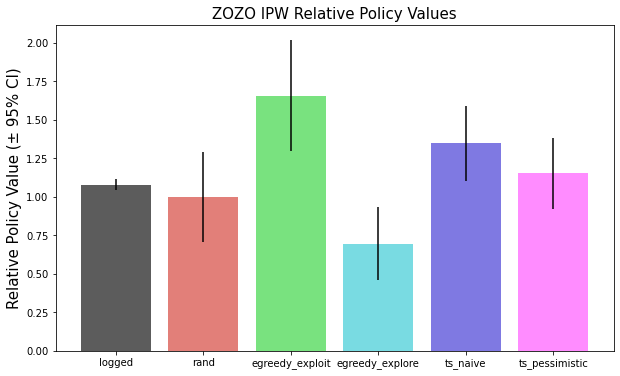

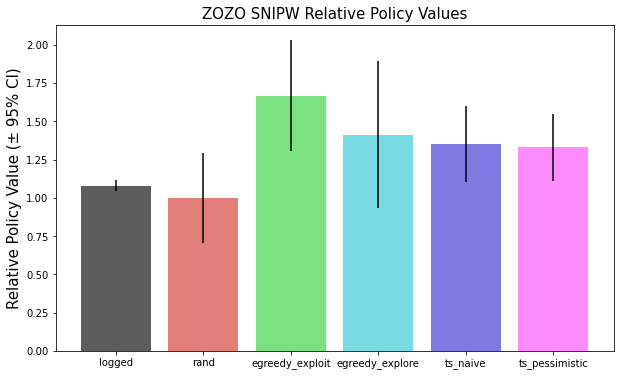

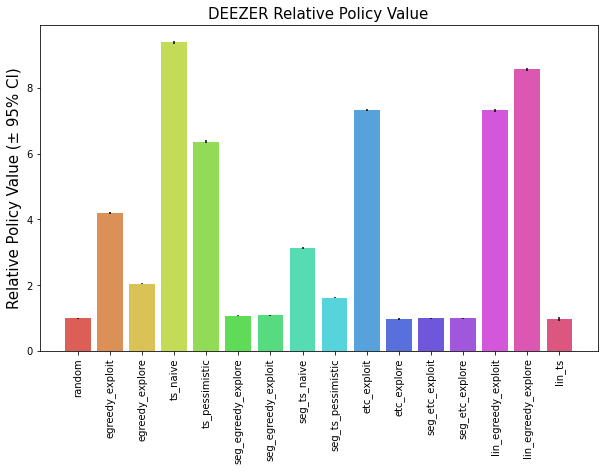

In [56]:
## ZOZOTOWN Bar Graph of Relative Policy

# TODO: Turn into loop over OBPs

# IPW

means = []
cis = []
policies = []

for policy, reward in zozo_ipw.get('reward_summary').items():
    mean = zozo_ipw.get('reward_summary').get(policy).get('mean')
    ci = (zozo_ipw.get('reward_summary').get(policy).get('95.0% CI (lower)'), zozo_ipw.get('reward_summary').get(policy).get('95.0% CI (upper)'))
    
    policies.append(policy)
    cis.append(ci)
    means.append(mean)

# Making Relative to Random, creating CIs
baseline = zozo_ipw.get('reward_summary').get('rand').get('mean')
cis = np.array(cis) / baseline
means = [means[i]/baseline for i in range(0,len(means))]
y_r = [means[i] - cis[i][1] for i in range(len(cis))]

# labeling
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(range(len(means)), means, yerr=y_r, alpha=0.8, align='center', color=['#333333', '#db5f57', '#57db5f', '#57d3db', '#5f57db', '#FF6FFF'])
plt.xticks(range(len(means)), [policy for policy in policies])
plt.ylabel(f"Relative Policy Value (± {np.int(100*(1 - 0.05))}% CI)")
plt.title('ZOZO IPW Relative Policy Values')
plt.savefig(str(fig_dir / 'ZOZO_IPW_Relative_Policy_Value.png'), dpi = 1500)

## SNIPW
means = []
cis = []
policies = []

for policy, reward in zozo_snipw.get('reward_summary').items():
    mean = zozo_snipw.get('reward_summary').get(policy).get('mean')
    ci = (zozo_snipw.get('reward_summary').get(policy).get('95.0% CI (lower)'), zozo_snipw.get('reward_summary').get(policy).get('95.0% CI (upper)'))
    
    policies.append(policy)
    cis.append(ci)
    means.append(mean)

# Making Relative to Random, creating CIs
baseline = zozo_snipw.get('reward_summary').get('rand').get('mean')
cis = np.array(cis) / baseline
means = [means[i]/baseline for i in range(0,len(means))]
y_r = [means[i] - cis[i][1] for i in range(len(cis))]

# labeling
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(range(len(means)), means, yerr=y_r, alpha=0.8, align='center', color=['#333333', '#db5f57', '#57db5f', '#57d3db', '#5f57db', '#FF6FFF'])
plt.xticks(range(len(means)), [policy for policy in policies])
plt.ylabel(f"Relative Policy Value (± {np.int(100*(1 - 0.05))}% CI)")
plt.title('ZOZO SNIPW Relative Policy Values')
plt.savefig(str(fig_dir / 'ZOZO_SNIPW_Relative_Policy_Value.png'), dpi = 1500)




## DEEZER Bar Graph of Relative Policy
means = []
cis = []
policies = []

for results in deezer_results:
    for policy, reward in results.get('reward_summary').items():
        mean = results.get('reward_summary').get(policy).get('mean')
        ci = (results.get('reward_summary').get(policy).get('95.0% CI (lower)'), results.get('reward_summary').get(policy).get('95.0% CI (upper)'))

        policies.append(policy)
        cis.append(ci)
        means.append(mean)

# Making Relative to Random, creating CIs
baseline = deezer_basic.get('reward_summary').get('random').get('mean')
cis = np.array(cis) / baseline
means = [means[i]/baseline for i in range(0,len(means))]
y_r = [means[i] - cis[i][1] for i in range(len(cis))] # up and down errors 

# labeling
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(range(len(means)), means, yerr=y_r, alpha = 1, align='center', color = list(sns.color_palette("hls", len(means)).as_hex()))
plt.xticks(range(len(means)), [policy for policy in policies], rotation = 90)
plt.ylabel(f"Relative Policy Value (± {np.int(100*(1 - 0.05))}% CI)")
plt.title('DEEZER Relative Policy Value')

plt.rc('axes', labelsize=15)    
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)   

plt.savefig(str(fig_dir / 'DEEZER_Relative_Policy_Value.png'), dpi = 1500, bbox_inches='tight')